In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
bike=pd.read_csv('C:/Users/dustn/Desktop/bike/2021/new_ride_data_2021.csv',encoding='cp949')

In [3]:
# 메모리 줄이기
bike[['rental_code','sex','age']]=bike[['rental_code','sex','age']].astype('category')
bike[['calories','carbon','distance']]=bike[['calories','carbon','distance']].astype('float32')

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   718857 non-null  object  
 1   rental_code  718857 non-null  category
 2   sex          401235 non-null  category
 3   age          718857 non-null  category
 4   usage        718857 non-null  int64   
 5   calories     714288 non-null  float32 
 6   carbon       714288 non-null  float32 
 7   distance     718857 non-null  float32 
 8   usage_time   718857 non-null  int64   
 9   location     718857 non-null  object  
dtypes: category(3), float32(3), int64(2), object(2)
memory usage: 32.2+ MB


In [5]:
bike.describe()

,usage,calories,carbon,distance,usage_time
count,718857.000000,714288.000000,714288.000000,718857.000000,718857.000000
mean,1.088958,82.053123,0.708353,3033.822021,28.062467
std,0.339713,117.598289,0.994584,4280.853027,33.246788
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.090000,0.190000,789.020020,8.000000
50%,1.000000,45.070000,0.390000,1680.000000,16.000000
75%,1.000000,96.050003,0.830000,3569.610107,37.000000
max,14.000000,8621.750000,57.630001,248420.000000,1753.000000


In [6]:
# 날짜 형식 지정
bike['Unnamed: 0'] = pd.to_datetime(bike['Unnamed: 0'])
bike['hour'] = bike['Unnamed: 0'].dt.hour
bike['weekday'] = bike['Unnamed: 0'].dt.weekday
bike['day'] = bike['Unnamed: 0'].dt.day
bike['month'] = bike['Unnamed: 0'].dt.month
bike['weekend'] = bike['weekday'].isin([5,6]).astype(int)
bike['week'] = bike['Unnamed: 0'].dt.isocalendar().week

In [7]:
# 날짜 인덱스 형성
date_column=[]
for i in bike['Unnamed: 0']:
    date_column.append(i)
bike.index=pd.to_datetime(date_column) 

bike.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
bike

,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,weekday,day,month,weekend,week
2021-01-01 00:00:00,정기권,NaN,10대,2,28.900000,0.23,992.780029,13,1347_길음래미안아파트817동 상가 앞,0,4,1,1,0,53
2021-01-01 00:00:00,정기권,NaN,10대,1,34.380001,0.26,1127.500000,10,1349_월계2교 버스정류장 앞,0,4,1,1,0,53
2021-01-01 00:00:00,정기권,NaN,10대,1,0.000000,0.00,0.000000,7,1168_마곡엠밸리10단지 앞,0,4,1,1,0,53
2021-01-01 00:00:00,정기권,NaN,10대,1,38.750000,0.38,1658.339966,14,2619_석촌고분역 4번출구,0,4,1,1,0,53
2021-01-01 00:00:00,정기권,NaN,10대,1,12.960000,0.17,743.880005,5,536_행당역 2번출구 앞,0,4,1,1,0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 23:00:00,단체권,NaN,10대,5,916.659973,8.66,37335.949219,219,207_여의나루역 1번출구 앞,23,6,31,1,1,4
2021-01-31 23:00:00,단체권,NaN,20대,2,492.869995,4.51,19447.099609,133,3549_건영아파트 앞,23,6,31,1,1,4
2021-01-31 23:00:00,단체권,NaN,20대,2,348.429993,2.91,12569.639648,90,248_초원아파트 앞,23,6,31,1,1,4
2021-01-31 23:00:00,단체권,NaN,20대,2,98.099998,0.77,3302.870117,20,131_증산2교,23,6,31,1,1,4


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

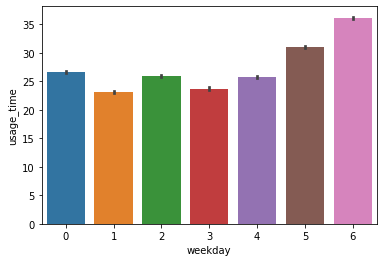

In [10]:
# 요일별 이용량
fig = plt.figure()
sns.barplot(data = bike, x= 'weekday', y = 'usage_time')
plt.show()

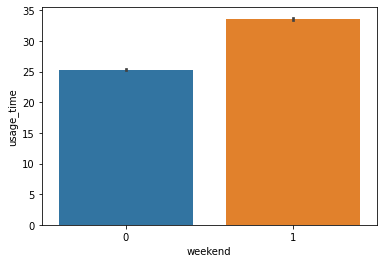

In [11]:
# 주중 주말별 이용량
fig = plt.figure()
sns.barplot(data = bike, x= 'weekend', y = 'usage_time')
plt.show()

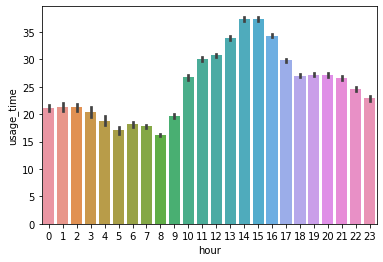

In [12]:
# 시간별 이용량
fig = plt.figure()
sns.barplot(data = bike, x= 'hour', y = 'usage_time')
plt.show()

In [13]:
# 강수량 데이터 처리
rain=pd.read_csv('C:/Users/dustn/Desktop/bike/19~21 강수량데이터.csv',encoding='cp949')

In [14]:
rain=rain.fillna(0)

In [15]:
rain_date_column=[]
for i in rain['날짜']:
    rain_date_column.append(i)
rain.index=pd.to_datetime(rain_date_column) 

rain.drop(['날짜','지점'],axis=1,inplace=True)

In [16]:
rain_bike=bike.join(rain, how='left')

In [17]:
rain_bike=rain_bike.rename(columns={'강수량(mm)':'precipitation'})

In [18]:
rain_bike['precipitation']=rain_bike['precipitation'].fillna(method='ffill')

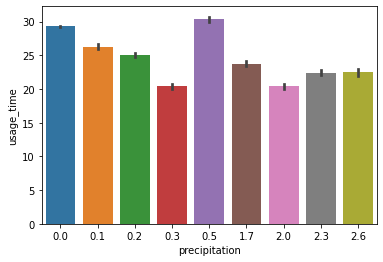

In [19]:
# 강수량별 이용량
fig = plt.figure()
sns.barplot(data = rain_bike, x='precipitation',y='usage_time')
plt.show()

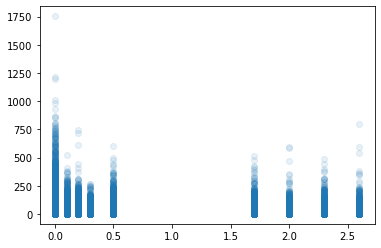

In [28]:
plt.scatter(rain_bike['precipitation'],rain_bike['usage_time'],alpha=.1)
plt.show()

In [30]:
# 기온 데이터 처리
temp=pd.read_csv('C:/Users/dustn/Desktop/bike/19~21 기온데이터.csv',encoding='cp949')

In [31]:
temp_date_column=[]
for i in temp['날짜']:
    temp_date_column.append(i)
temp.index=pd.to_datetime(temp_date_column) 

temp.drop(['날짜','지점','최저기온(℃)','최고기온(℃)'],axis=1,inplace=True)

In [32]:
merge_bike=rain_bike.join(temp, how='left')

In [33]:
merge_bike=merge_bike.rename(columns={'평균기온(℃)':'temperature'})

In [34]:
merge_bike['temperature']=merge_bike['temperature'].fillna(method='ffill')

In [35]:
merge_bike.head()

,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,weekday,day,month,weekend,week,precipitation,temperature
2021-01-01,정기권,NaN,10대,2,28.900000,0.23,992.780029,13,1347_길음래미안아파트817동 상가 앞,0,4,1,1,0,53,0.0,-4.2
2021-01-01,정기권,NaN,10대,1,34.380001,0.26,1127.500000,10,1349_월계2교 버스정류장 앞,0,4,1,1,0,53,0.0,-4.2
2021-01-01,정기권,NaN,10대,1,0.000000,0.00,0.000000,7,1168_마곡엠밸리10단지 앞,0,4,1,1,0,53,0.0,-4.2
2021-01-01,정기권,NaN,10대,1,38.750000,0.38,1658.339966,14,2619_석촌고분역 4번출구,0,4,1,1,0,53,0.0,-4.2
2021-01-01,정기권,NaN,10대,1,12.960000,0.17,743.880005,5,536_행당역 2번출구 앞,0,4,1,1,0,53,0.0,-4.2


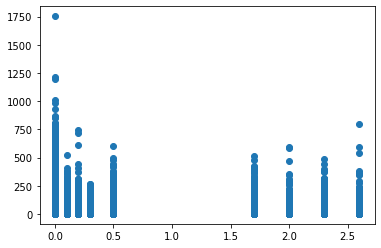

In [38]:
plt.scatter(merge_bike['precipitation'],merge_bike['usage_time'])

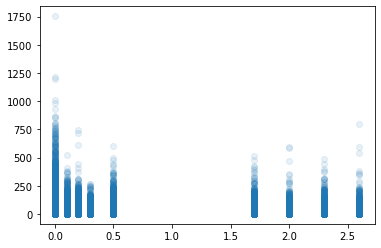

In [41]:
plt.scatter(merge_bike['precipitation'],merge_bike['usage_time'],alpha=.1)

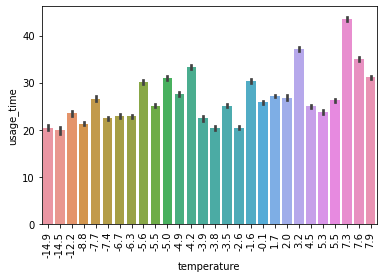

In [225]:
# 기온별 이용량
fig = plt.figure()
sns.barplot(data = merge_bike, x='temperature',y='usage_time')
plt.xticks(rotation =90)
plt.show()

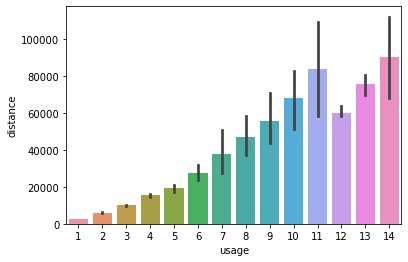

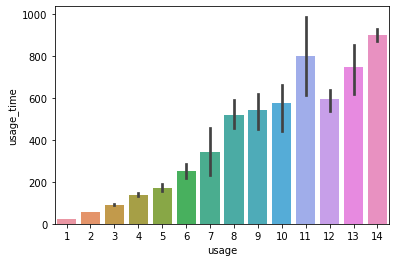

In [148]:
# distance, usage_time 둘 다 각각 usage로 나눠야 평균 값을 제대로 구할 수 있음을 보여주는 그래프
fig = plt.figure()
plt.figure(1)
sns.barplot(data = merge_bike, x='usage',y='distance')
plt.figure(2)
sns.barplot(data = merge_bike, x='usage',y='usage_time')
plt.show()

In [188]:
merge_bike['mean_distance']=merge_bike['distance']/merge_bike['usage']
merge_bike['mean_usage_time']=merge_bike['usage_time']/merge_bike['usage']
merge_bike['mean_dis_time']=merge_bike['distance']/merge_bike['usage_time']
merge_bike['mean_km_h']=(merge_bike['distance']/1000)/(merge_bike['usage_time']/60)

In [189]:
merge_bike.sort_values(by=["mean_dis_time"], ascending=[False])[:90]
# usage_time이 0인데 나머지 것들이 측정된 것들 88개 존재.. 이상치!

,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,...,day,month,weekend,week,precipitation,temperature,mean_distance,mean_usage_time,mean_dis_time,mean_km_h
2021-01-06 08:00:00,정기권,M,40대,1,90.529999,0.590000,2540.000000,0,2243_서울가정법원,8,...,6,1,0,1,2.3,-7.4,2540.000000,0.0,inf,inf
2021-01-27 17:00:00,정기권,M,20대,1,5.370000,0.050000,208.529999,0,1211_방이삼거리,17,...,27,1,0,4,0.0,1.7,208.529999,0.0,inf,inf
2021-01-26 15:00:00,정기권,NaN,30대,1,55.930000,5.460000,23540.000000,0,385_종각역 5번출구,15,...,26,1,0,4,1.7,5.3,23540.000000,0.0,inf,inf
2021-01-10 19:00:00,정기권,M,50대,1,213.850006,1.870000,8060.000000,0,2255_시민의숲역 1번출구 옆,19,...,10,1,1,1,0.0,-7.7,8060.000000,0.0,inf,inf
2021-01-22 21:00:00,정기권,M,30대,1,4.660000,0.030000,141.889999,0,321_KEB 하나금융그룹 명동사옥 옆,21,...,22,1,0,3,0.1,5.5,141.889999,0.0,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25 18:00:00,정기권,NaN,40대,1,2.860000,0.030000,111.199997,0,1190_마곡역 교차로(2번출구),18,...,25,1,0,4,0.0,7.9,111.199997,0.0,inf,inf
2021-01-13 15:00:00,정기권,NaN,30대,1,4.540000,0.040000,176.210007,0,1403_중화빌딩 앞 (동부시장),15,...,13,1,0,2,0.0,2.0,176.210007,0.0,inf,inf
2021-01-06 09:00:00,정기권,F,20대,1,37.070000,0.360000,1560.000000,0,2292_무지개아파트 앞,9,...,6,1,0,1,2.3,-7.4,1560.000000,0.0,inf,inf
2021-01-29 16:00:00,정기권,F,50대,1,5902.459961,57.630001,248420.000000,8,1163_방화동강서기동대앞,16,...,29,1,0,4,0.0,-8.8,248420.000000,8.0,31052.5,1863.149986


In [198]:
# 대략 이정도를 평균 시속 이상치로 볼 수 있을듯
merge_bike[merge_bike['mean_km_h']>30].sort_values(by=["mean_km_h"], ascending=[False])[88:]

,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,...,day,month,weekend,week,precipitation,temperature,mean_distance,mean_usage_time,mean_dis_time,mean_km_h
2021-01-29 16:00:00,정기권,F,50대,1,5902.459961,57.630001,248420.000000,8,1163_방화동강서기동대앞,16,...,29,1,0,4,0.0,-8.8,248420.000000,8.0,31052.500000,1863.149986
2021-01-09 17:00:00,정기권,NaN,20대,1,5239.299805,54.810001,236260.000000,8,1112_마곡엠밸리4단지 정문,17,...,9,1,1,1,0.0,-12.2,236260.000000,8.0,29532.500000,1771.949959
2021-01-25 19:00:00,정기권,F,20대,1,5094.990234,50.590000,218070.000000,10,913_이마트 은평점,19,...,25,1,0,4,0.0,7.9,218070.000000,10.0,21807.000000,1308.420044
2021-01-28 17:00:00,정기권,NaN,20대,1,1828.589966,16.480000,71040.789062,4,2301_현대고등학교 건너편,17,...,28,1,0,4,2.0,-2.6,71040.789062,4.0,17760.197266,1065.611801
2021-01-11 13:00:00,정기권,NaN,30대,1,1753.989990,15.570000,67110.000000,4,1166_강서구립등빛도서관,13,...,11,1,0,2,0.0,-6.7,67110.000000,4.0,16777.500000,1006.650009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-03 13:00:00,일일권,NaN,20대,1,656.010010,6.410000,27610.000000,55,2025_흑석역 1번출구,13,...,3,1,1,53,0.0,-5.6,27610.000000,55.0,502.000000,30.120001
2021-01-06 03:00:00,정기권,M,40대,1,142.910004,1.050000,4510.930176,9,1112_마곡엠밸리4단지 정문,3,...,6,1,0,1,2.3,-7.4,4510.930176,9.0,501.214478,30.072867
2021-01-02 17:00:00,정기권,F,50대,1,310.220001,3.950000,17030.000000,34,1158_가양역 8번출구,17,...,2,1,1,53,0.0,-5.0,17030.000000,34.0,500.882355,30.052942
2021-01-16 16:00:00,일일권,M,20대,1,167.929993,1.280000,5507.339844,11,3707_드래곤타워 앞,16,...,16,1,1,2,0.0,-4.9,5507.339844,11.0,500.667267,30.040036


In [166]:
merge_bike.describe()[['mean_distance','mean_usage_time','mean_dis_time']]

,mean_distance,mean_usage_time,mean_dis_time
count,718857.000000,718857.000000,7.186820e+05
mean,2751.571533,25.467785,inf
std,3689.716553,27.829564,NaN
min,0.000000,0.000000,0.000000e+00
25%,765.849976,7.000000,7.667333e+01
50%,1594.770020,15.000000,1.307764e+02
75%,3300.000000,34.000000,1.687433e+02
max,248420.000000,1215.000000,inf


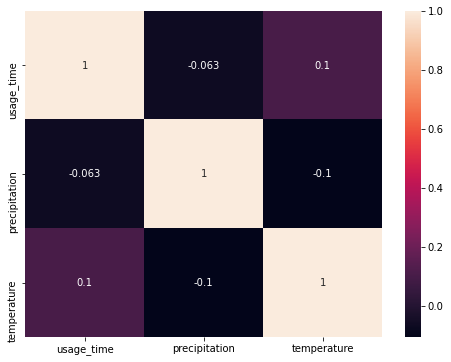

In [214]:
corr_df = merge_bike[['usage_time','precipitation','temperature']].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

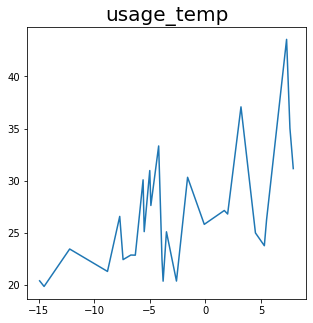

In [232]:
grouped=merge_bike.groupby('temperature')
usage_time=grouped['usage_time'].mean()
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(usage_time) ## 선그래프 생성
plt.title('usage_temp',fontsize=20) ## 타이틀 설정
plt.show()

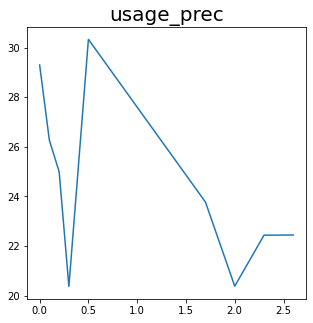

In [234]:
grouped=merge_bike.groupby('precipitation')
usage_time=grouped['usage_time'].mean()
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(usage_time) ## 선그래프 생성
plt.title('usage_prec',fontsize=20) ## 타이틀 설정
plt.show()